In [26]:
import numpy
from scipy import linalg
from matplotlib import pyplot
%matplotlib inline

In [27]:
L = 1.0
nx = 51
dx = L / (nx-1)
x = numpy.linspace(0.0, L, num=nx)

alpha = 1.22e-3
T0 = numpy.zeros(nx)
T0[0] = 100.0

In [44]:
def solve_1d(T0, nt, dt, dx, alpha, cI, cE, bc):
    T = T0.copy()
    N = len(T0) - 2
    A, b_bc = lhs_operator(N, dt, dx, alpha, cI, bc)
    for n in range(nt):
        b = rhs_vector(T, dt, dx, alpha, cE)
        T[1:-1] = linalg.solve(A, b)
        update_boundaries(T, dx, bc)
    return T

In [45]:
def lhs_operator(N, dt, dx, alpha, cI, bc):
    I = numpy.identity(N)
    L, b_bc = laplacian_1d(N, dx, bc)
    A = I / dt - cI * alpha * L
    return A, b_bc

In [46]:
def laplacian_1d(N, dx, bc):
    D = numpy.diag(-2.0 / dx**2 * numpy.ones(N))
    L = numpy.diag(1.0 / dx**2 * numpy.ones(N - 1), k=-1)
    U = numpy.diag(1.0 / dx**2 * numpy.ones(N - 1), k=+1)
    A = D + U + L
    b_bc = numpy.zeros(N)
    # Left boundary
    if bc['left']['type'] == 'Dirichlet':
        b_bc[0] = bc['left']['value'] / dx**2
    elif bc['left]']['type'] == 'Neumann':
        A[0,0] = -1.0 / dx**2
        b_bc[0] = bc['left']['value'] / dx
    # Right boundary
    if bc['right']['type'] == 'Dirichlet':
        b_bc[-1] = bc['right']['value'] / dx**2
    elif bc['right']['type'] == 'Neumann':
        A[-1,-1] = -1.0 / dx**2
        b_bc[-1] = bc['right']['value'] / dx
    return A, b_bc

In [47]:
bc_left = {'type': 'Dirichlet', 'value': 100.0}
bc_right = {'type': 'Neumann', 'value': 0.0}
bc = {'left' : bc_left, 'right' : bc_right}

In [48]:
def rhs_vector(T, dt, dx, alpha, cE):
    b = T[1:-1] / dt + cE * alpha * (T[:-2] - 2 * T[1:-1] + T[2:]) / dx**2
    return b

In [49]:
def update_boundaries(T, dx, bc):
    T[0] = get_boundary_value(T[1], dx, bc['left'])
    T[-1] = get_boundary_value(T[-2], dx, bc['right'])
    return

In [50]:
def get_boundary_value(T_neighbor, dx, bc):
    if bc['type'] == 'Dirichlet':
        return bc['value']
    elif bc['type'] == 'Neumann':
        return T_neighbor + bc['value'] * dx
    else:
        raise ValueError('Only Dirichlet and Neumann are supported')
    return

In [51]:
Tb = get_boundary_value(100.0, 1.0, {'type': 'Neumann', 'value': 0.0})
Tb

100.0

In [58]:
sigma = 0.5
dt = sigma * dx**2 / alpha
nt = 100

T = solve_1d(T0, nt, dt, dx, alpha, 1.0, 0.5, bc)

In [59]:
T

array([1.00000000e+02, 3.11609010e+01, 2.90029985e+01, 2.68738632e+01,
       2.47871575e+01, 2.27557049e+01, 2.07912549e+01, 1.89042821e+01,
       1.71038253e+01, 1.53973720e+01, 1.37907886e+01, 1.22882963e+01,
       1.08924918e+01, 9.60440905e+00, 8.42361638e+00, 7.34834423e+00,
       6.37563628e+00, 5.50151714e+00, 4.72116977e+00, 4.02911596e+00,
       3.41939382e+00, 2.88572691e+00, 2.42168091e+00, 2.02080424e+00,
       1.67675043e+00, 1.38338097e+00, 1.13484815e+00, 9.25658312e-01,
       7.50716638e-01, 6.05354945e-01, 4.85344515e-01, 3.86896086e-01,
       3.06649263e-01, 2.41653588e-01, 1.89343393e-01, 1.47508381e-01,
       1.14261656e-01, 8.80066728e-02, 6.74043180e-02, 5.13410741e-02,
       3.88989892e-02, 2.93279543e-02, 2.20206118e-02, 1.64900660e-02,
       1.23504487e-02, 9.30030620e-03, 7.10871437e-03, 5.60399713e-03,
       4.66491066e-03, 4.21416367e-03, 4.21416367e-03])

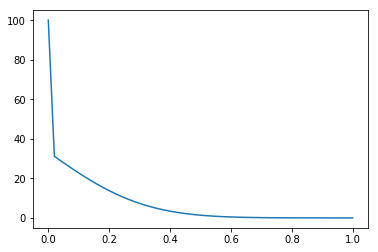

In [60]:
pyplot.plot(x,T)